[![image](https://raw.githubusercontent.com/visual-layer/visuallayer/main/imgs/vl_horizontal_logo.png)](https://www.visual-layer.com)

# Object Detection from Videos with YOLOv5

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/visual-layer/fastdup/blob/main/examples/video-yolov5-detection.ipynb)
[![Open in Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/visual-layer/fastdup/blob/main/examples/video-yolov5-detection.ipynb)

In this tutorial, we will use fastdup with a pretrained yolov5 object detection model to detect and crop from videos. Following that we analyze the cropped objects for issues such as duplicates, near-duplicates, outliers, bright/dark/blurry objects.

## Installation & Setting Up

In [1]:
!pip install fastdup kaggle -Uq

In [2]:
import fastdup
fastdup.__version__

/usr/bin/dpkg


'1.27'

## Download & Extract Dataset


Let's download a Tiktok [trending video dataset](https://www.kaggle.com/datasets/erikvdven/tiktok-trending-december-2020) from Kaggle. The dataset consists of the first 1000 trending videos scraped from TikTok on December 2020.

You can download the dataset by manually by heading to the dataset [homepage](https://www.kaggle.com/datasets/erikvdven/tiktok-trending-december-2020) or using the [Kaggle API](https://github.com/Kaggle/kaggle-api). 

Let's use the Kaggle API to download the dataset:

In [ ]:
!kaggle datasets download -d erikvdven/tiktok-trending-december-2020

Next, extract the .zip file into a folder named `data`.

In [3]:
!unzip -q tiktok-trending-december-2020.zip -d data 

## Video to Images

fastdup works on images. We must first turn the videos into frames of images.

We can use a one-liner fastdup utility function to turn all the videos in a folder into frames:

In [4]:
fastdup.extract_video_frames(input_dir="data/", work_dir="frames/")

FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.
2023-07-19 13:17:39 [INFO] Going to loop over dir data
2023-07-19 13:17:39 [INFO] Found total 1000 videos to run on, 1000 train, 0 test, name list 1000, counter 1000 


0

## Run fastdup

Now that we have the frames of images, let's run fastdup and analyze the frames.

In [5]:
fd = fastdup.create(input_dir='frames/')

For demonstration we'll just run on `num_images=2000`, feel free to change its value or omitting it altogether to run it on the entire dataset.

In [6]:
fd.run(bounding_box='yolov5s', num_images=2000)

FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.
2023-07-19 13:18:11 [INFO] Going to loop over dir frames
2023-07-19 13:18:11 [INFO] Found total 2000 images to run on, 2000 train, 0 test, name list 2000, counter 2000 
FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.utes
2023-07-19 13:21:54 [INFO] Going to loop over dir /tmp/crops_input.csv
2023-07-19 13:21:54 [INFO] Found total 2000 images to run on, 2000 train, 0 test, name list 2000, counter 2000 
2023-07-19 13:21:59 [INFO] Found total 2000 images to run ontimated: 0 Minutes
Finished histogram 0.400
Finished bucket sort 0.409
2023-07-19 13:21:59 [INFO] 36) Finished write_index() NN model
2023-07-19 13:21:59 [INFO] Stored nn model index file work_dir/nnf.index
2023-07-19 13:21:59 [INFO] Total time took 5078 ms
2023-07-19 13:21:59 [INFO] Found a total of 6 fully identical images (d>0.990), which are 0.15 %
2023-07-19 13:21:59 [INFO] Found a total of 47 nearly identical images(d>0.980)

0

## Components Gallery

We can visualize the cluster of similar detections using the components gallery view. Specify `draw_bbox=True` to see the detection bounding box on the original image.

In [7]:
# fd.vis.component_gallery(draw_bbox=True)

If you'd like to view just the cropped bounding box images, specify `draw_bbox=False`

100%|██████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 80.17it/s]


Finished OK. Components are stored as image files work_dir/galleries/components_[index].jpg
Stored components visual view in  work_dir/galleries/components.html
Execution time in seconds 0.5



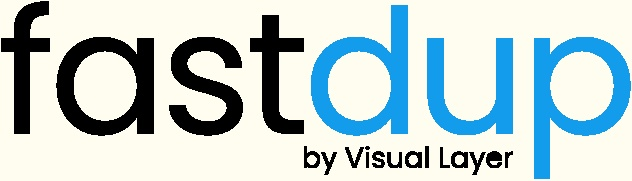
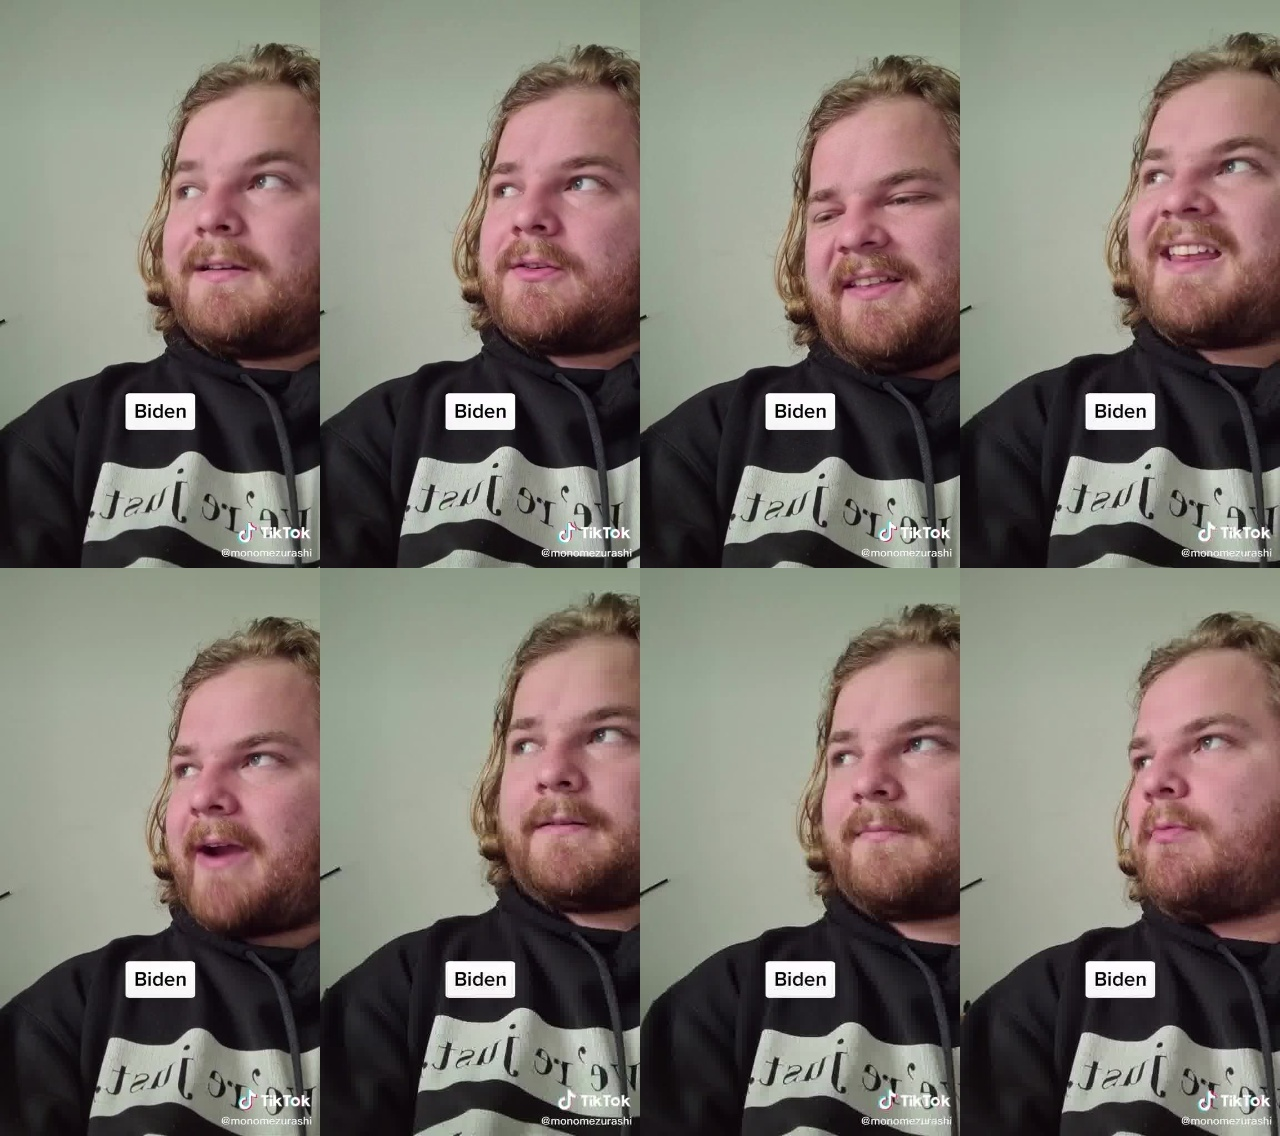
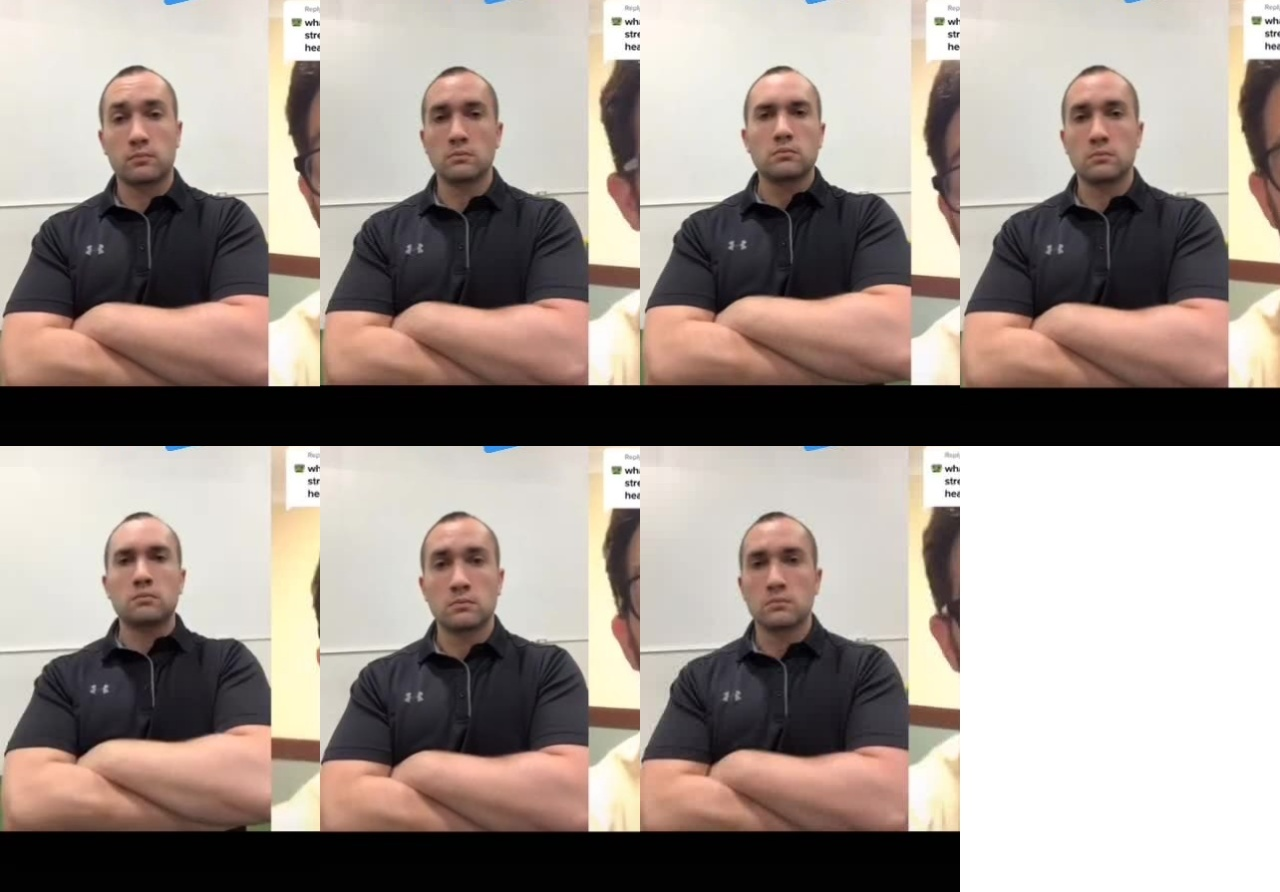
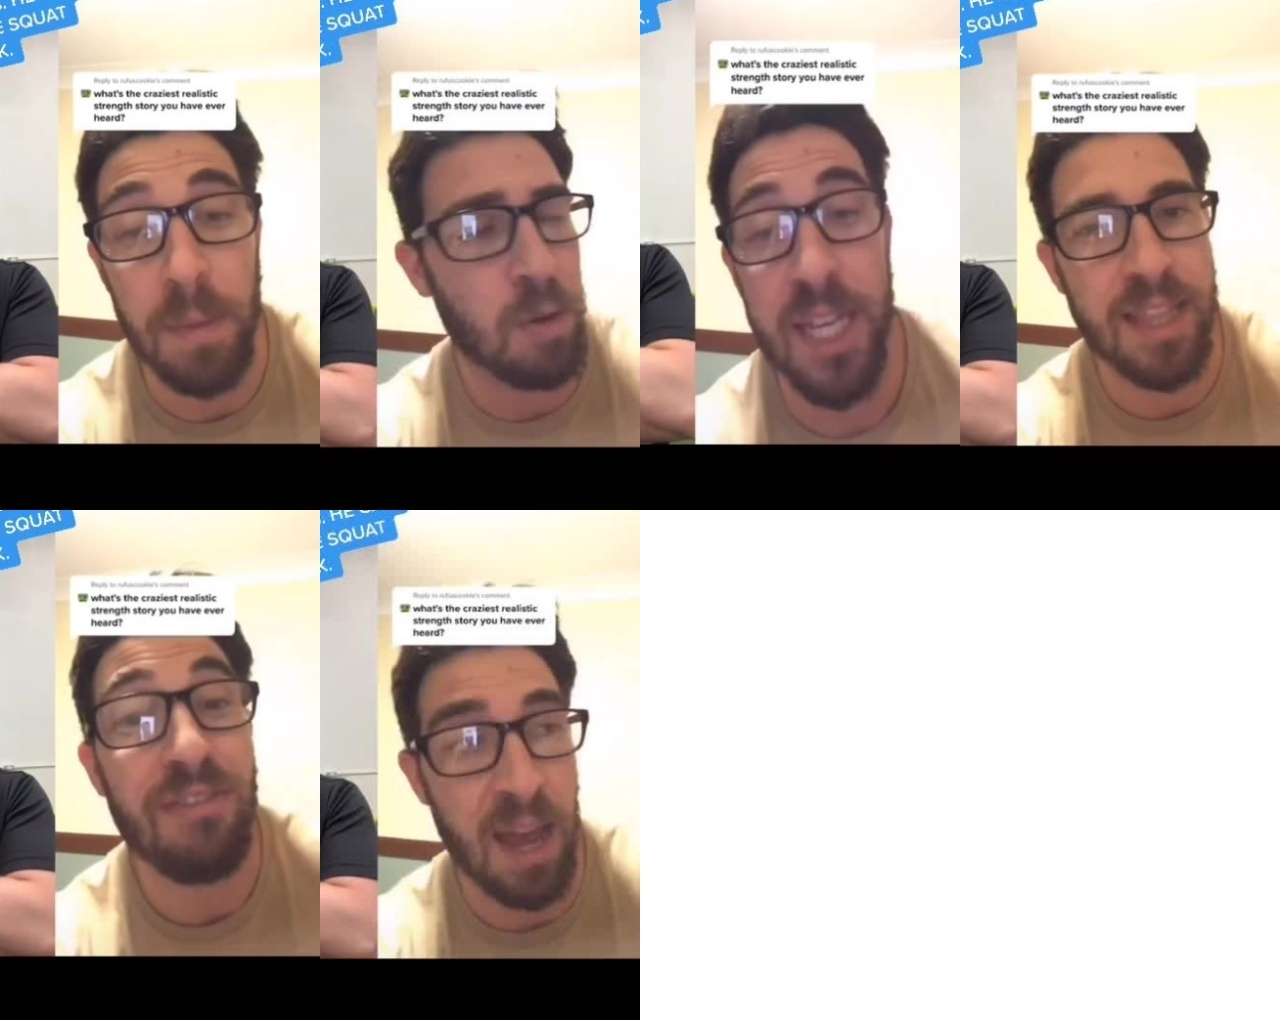
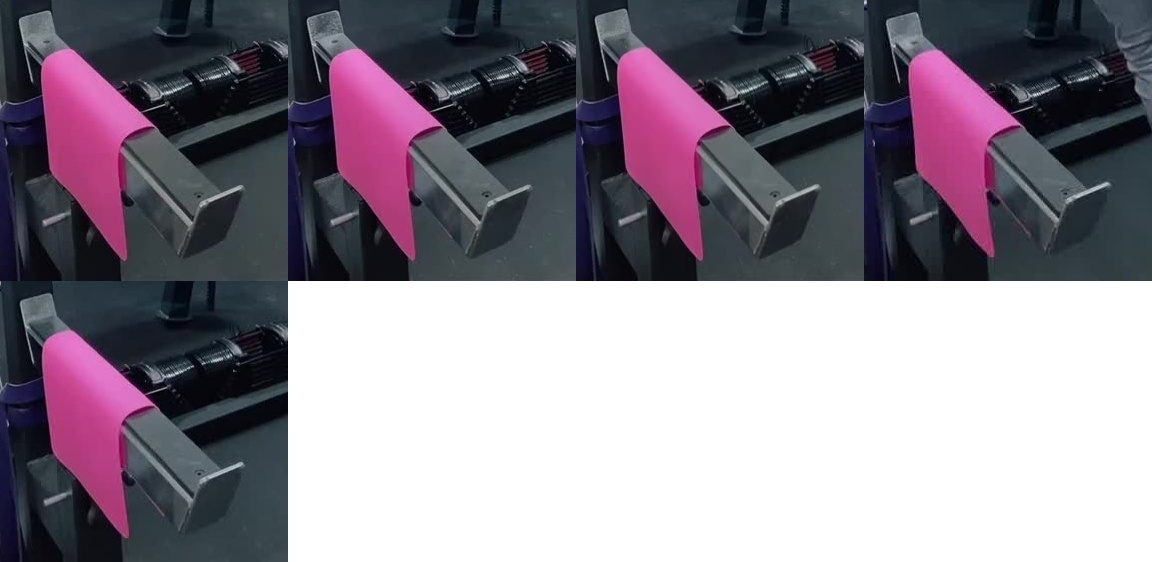
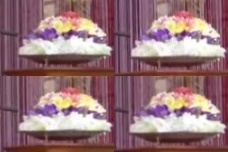
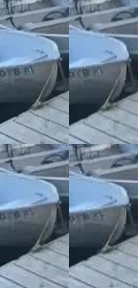
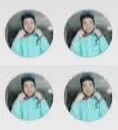
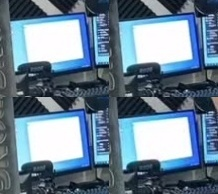
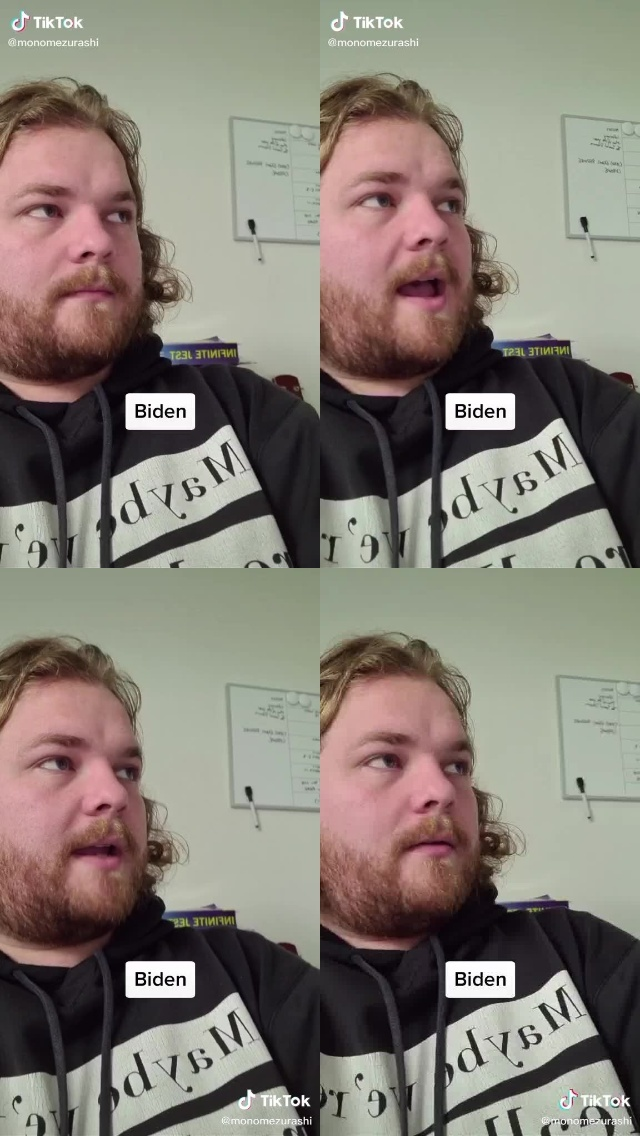
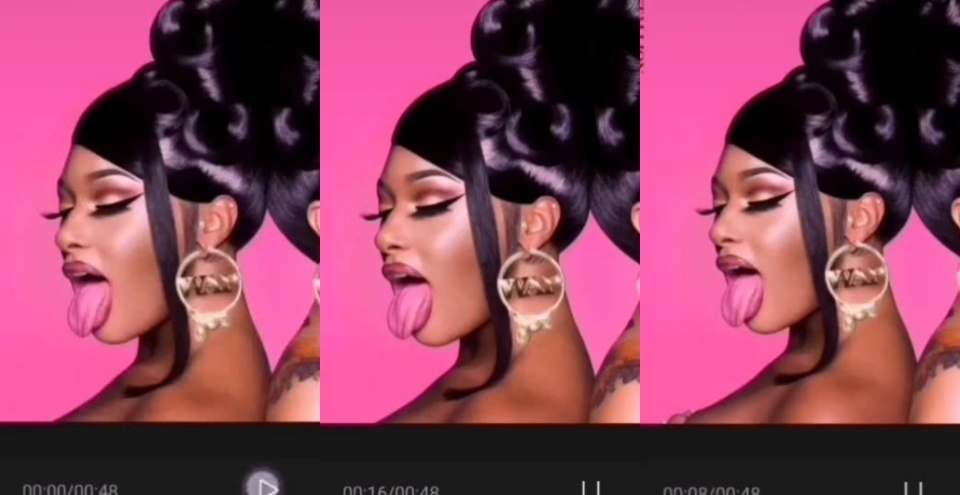
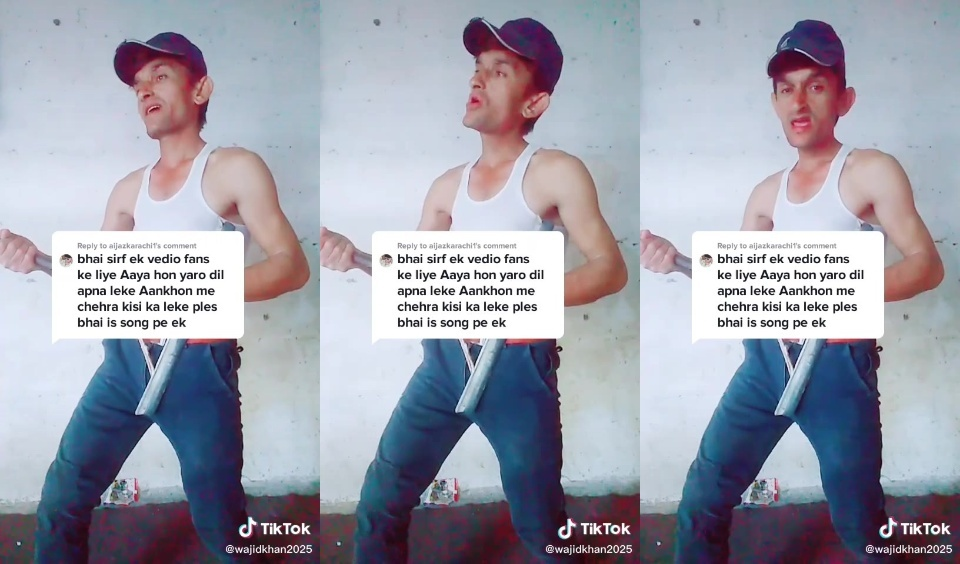
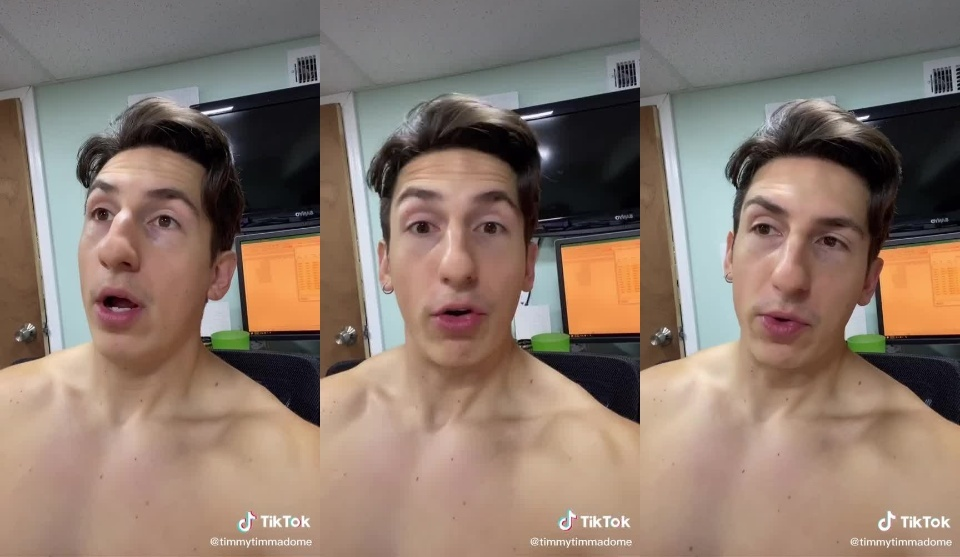
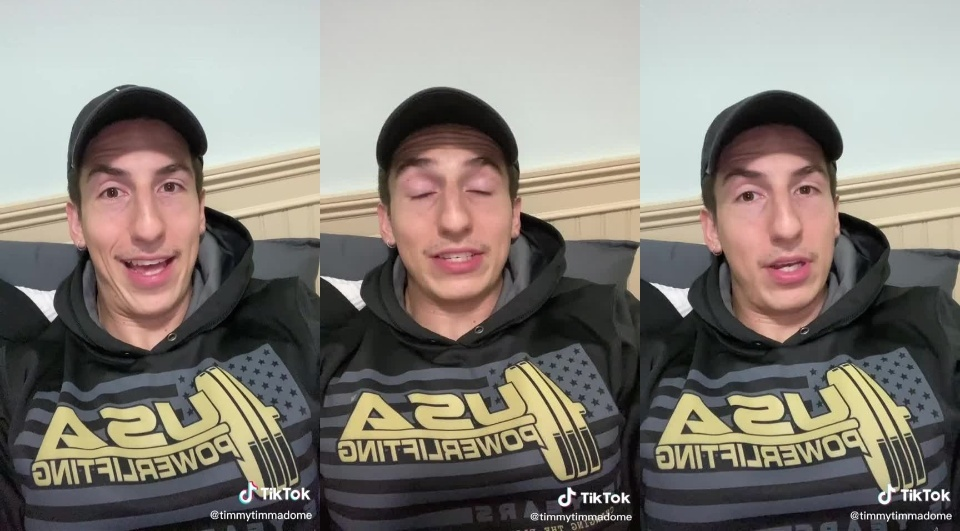
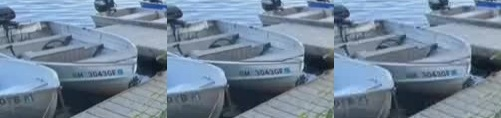
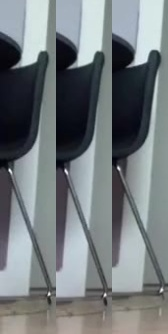
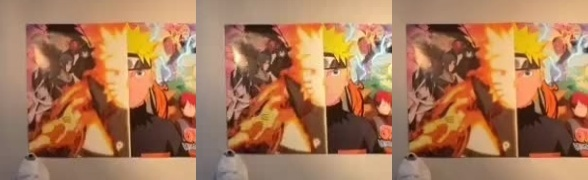
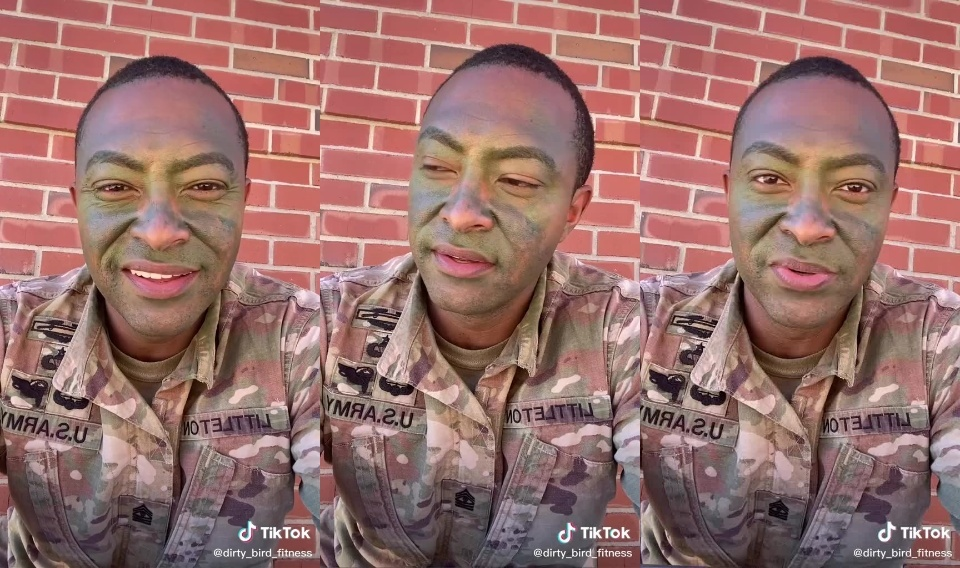
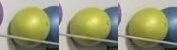
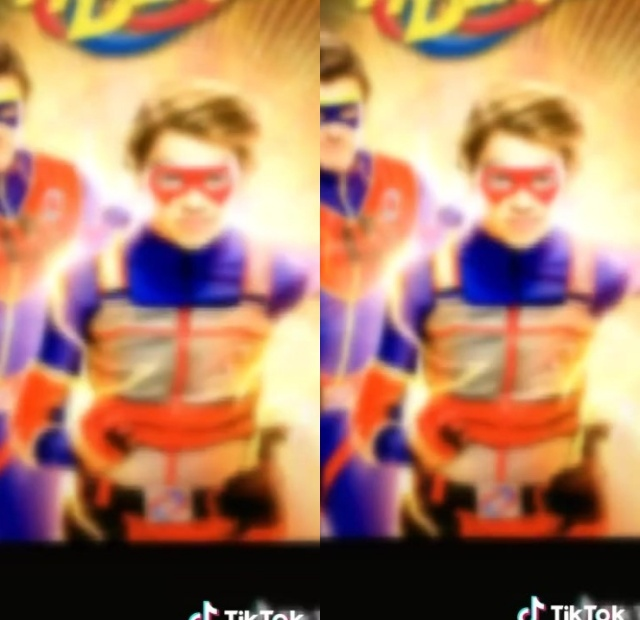
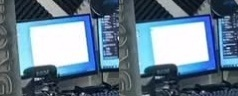

0

In [8]:
fd.vis.component_gallery(draw_bbox=False)

## Find Similar Objects Across Videos

Using the `similarity_gallery` view, we can find similar looking detections across all the extracted frames.

100%|█████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 106.64it/s]


Stored similar images visual view in  work_dir/galleries/similarity.html



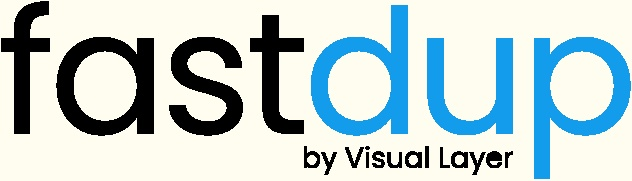
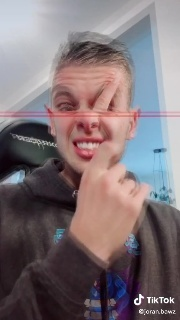
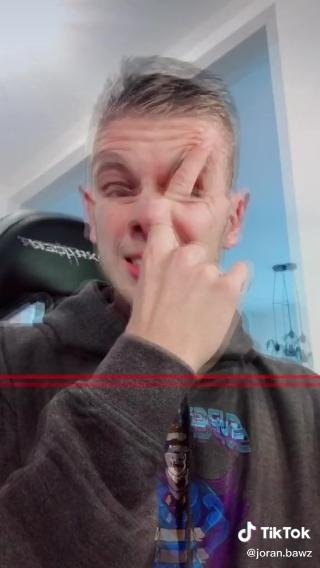
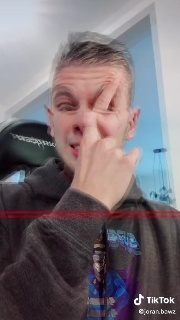
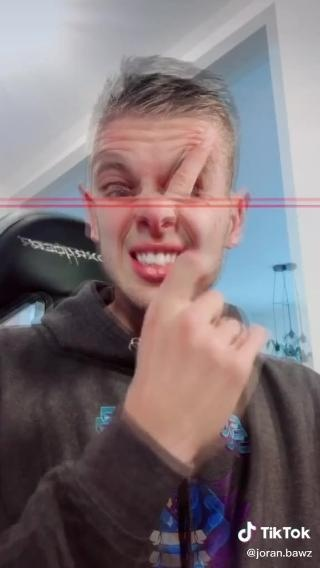
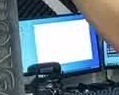
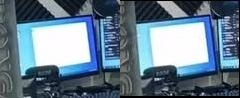
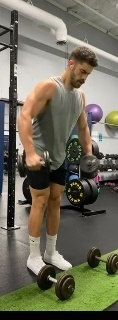
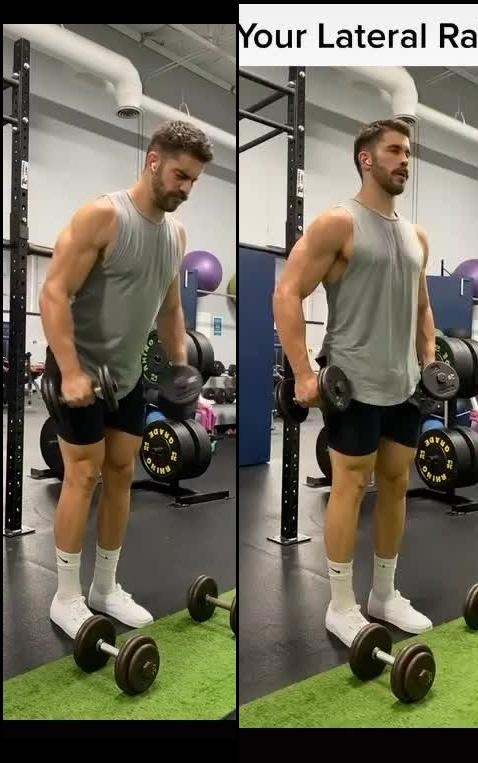
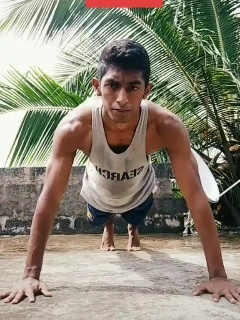
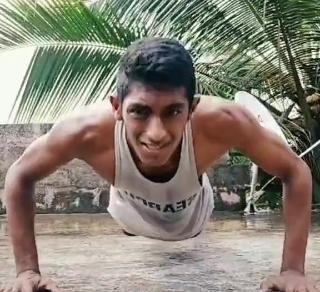
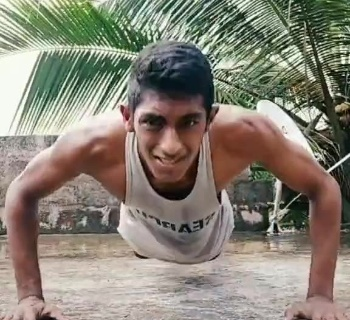
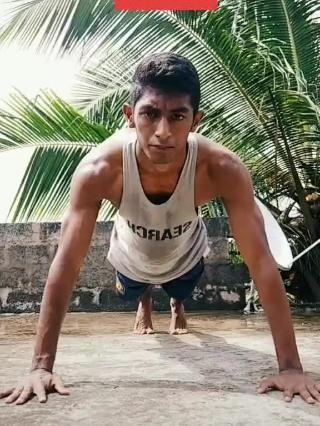
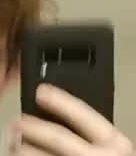
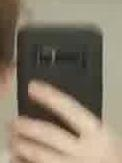
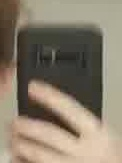
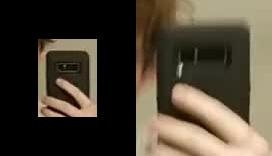
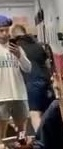
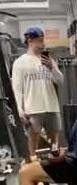
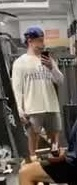
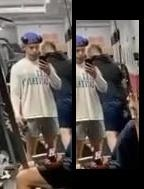
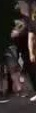
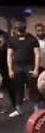
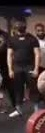
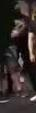
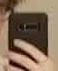
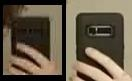
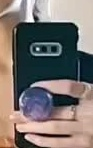
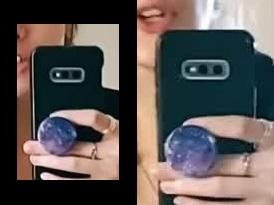
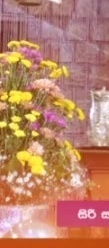
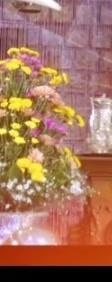
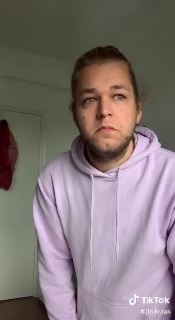
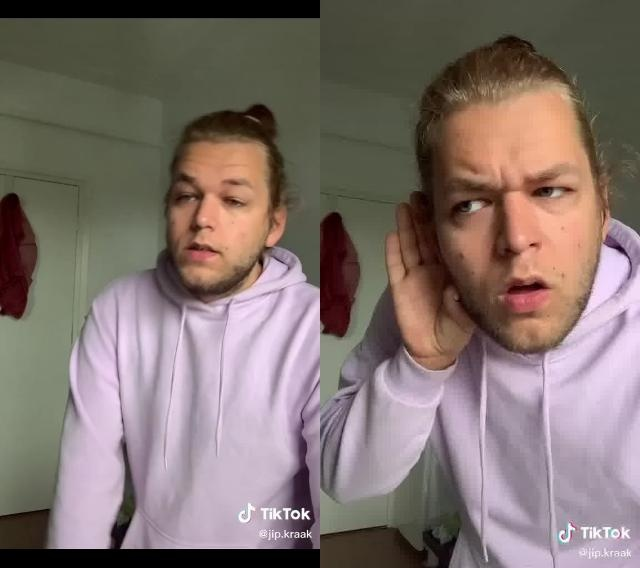
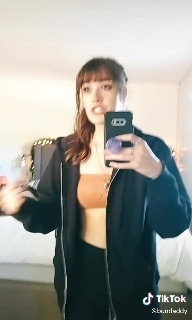
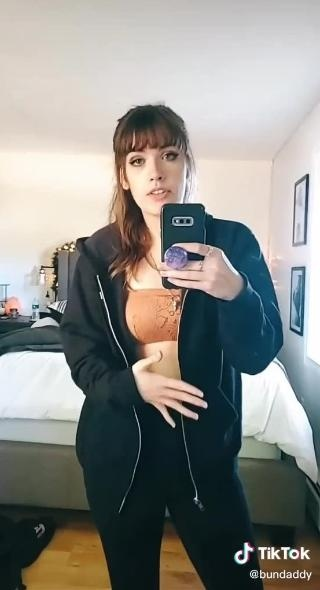
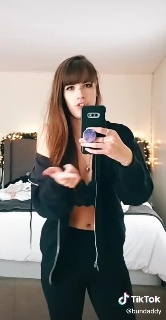
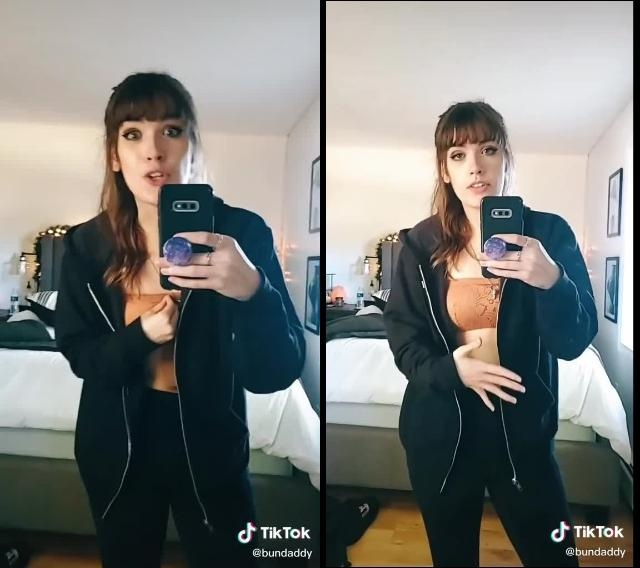
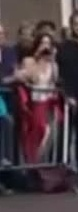
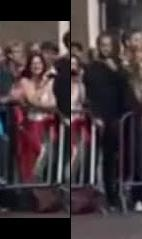
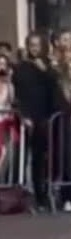
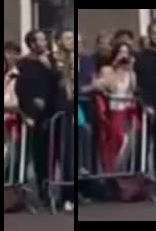

from                                                                                                                                                                                                to              distance
393    work_dir/crops/framestmpdatavideos6881662658794294529.mp4output_000002.jpg_0_107_565_910.jpg                                                                                                   [work_dir/crops/framestmpdatavideos6881662658794294529.mp4output_000003.jpg_-3_118_573_910.jpg]            [0.900053]
394   work_dir/crops/framestmpdatavideos6881662658794294529.mp4output_000003.jpg_-3_118_573_910.jpg                                                                                                    [work_dir/crops/framestmpdatavideos6881662658794294529.mp4output_000002.jpg_0_107_565_910.jpg]            [0.900053]
518     work_dir/crops/framestmpdatavideos6884030480736324869.mp4output_000007.jpg_94_458_85_69.jpg        [work_dir/crops/framestmpdatavideos6884030480736324869.mp4output_000001.jpg_98_456_85_69.jpg, work_dir/crops/framestmpdatavideos6884030480736324869.mp4output_000005.jpg_96_456_86_70.jpg]  [0.900069, 0.910266]
526  work_dir/crops/framestmpdatavideos6884031629522717953.mp4output_000004.jpg_213_239_192_518.jpg  [work_dir/crops/framestmpdatavideos6884031629522717953.mp4output_000001.jpg_183_221_171_545.jpg, work_dir/crops/framestmpdatavideos6884031629522717953.mp4output_000005.jpg_222_246_167_510.jpg]  [0.900163, 0.955997]
438   work_dir/crops/framestmpdatavideos6882598038947286274.mp4output_000002.jpg_42_306_512_549.jpg                                                                                                    [work_dir/crops/framestmpdatavideos6882598038947286274.mp4output_000004.jpg_5_450_566_376.jpg]            [0.900303]
..                                                                                              ...                                                                                                                                                                                               ...                   ...
61   work_dir/crops/framestmpdatavideos6877179236386376961.mp4output_000010.jpg_296_586_243_291.jpg                                                                                                  [work_dir/crops/framestmpdatavideos6877179236386376961.mp4output_000001.jpg_298_589_243_293.jpg]            [0.985541]
486   work_dir/crops/framestmpdatavideos6883600153593367810.mp4output_000005.jpg_53_285_274_595.jpg                                                                                                   [work_dir/crops/framestmpdatavideos6883600153593367810.mp4output_000003.jpg_56_286_277_592.jpg]            [0.992225]
482   work_dir/crops/framestmpdatavideos6883600153593367810.mp4output_000003.jpg_56_286_277_592.jpg                                                                                                   [work_dir/crops/framestmpdatavideos6883600153593367810.mp4output_000005.jpg_53_285_274_595.jpg]            [0.992225]
483    work_dir/crops/framestmpdatavideos6883600153593367810.mp4output_000004.jpg_0_248_242_781.jpg                                                                                                    [work_dir/crops/framestmpdatavideos6883600153593367810.mp4output_000002.jpg_2_248_238_781.jpg]            [0.995255]
480    work_dir/crops/framestmpdatavideos6883600153593367810.mp4output_000002.jpg_2_248_238_781.jpg                                                                                                    [work_dir/crops/framestmpdatavideos6883600153593367810.mp4output_000004.jpg_0_248_242_781.jpg]            [0.995255]

[549 rows x 3 columns]

In [9]:
fd.vis.similarity_gallery(draw_bbox=False)

## Find Outliers

Useing the `outliers_gallery` we can also visualize detections that looks visually different from others.

100%|███████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 29715.22it/s]

Stored outliers visual view in  work_dir/galleries/outliers.html



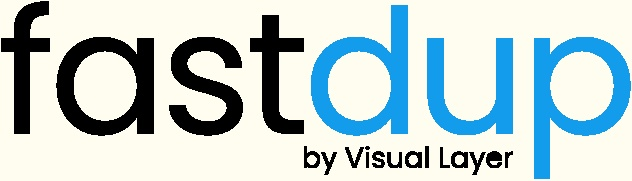
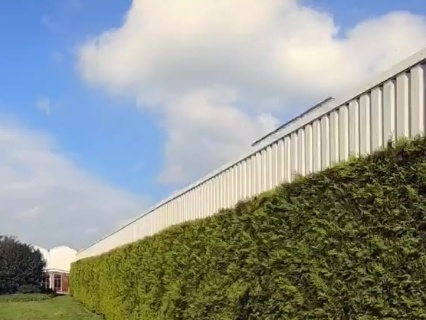
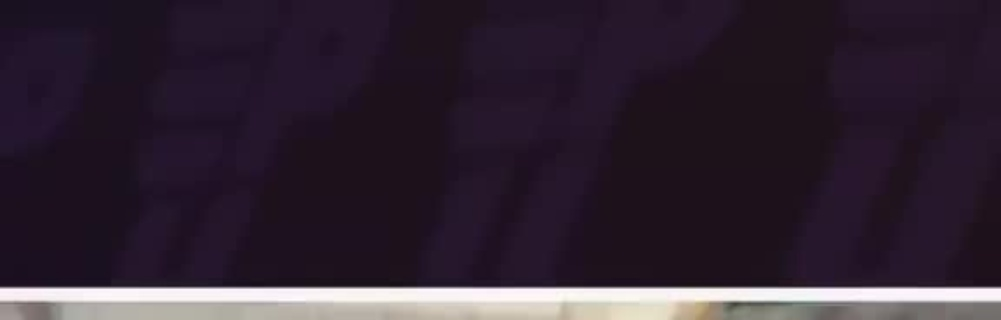
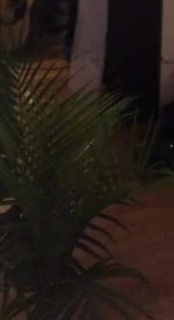
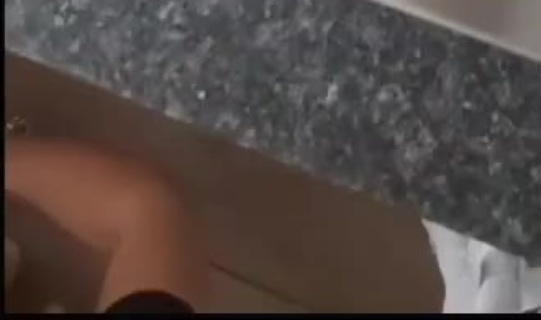
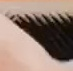
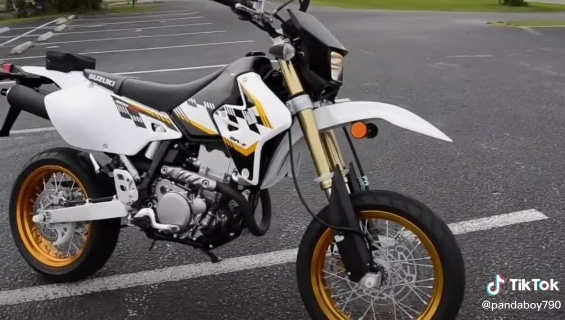
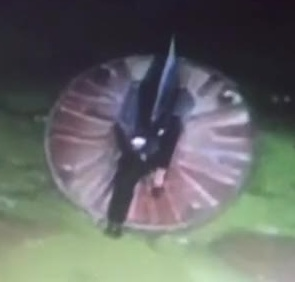
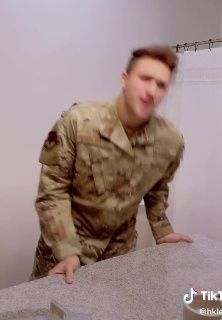
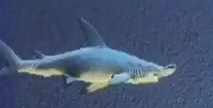
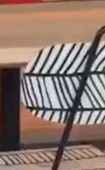
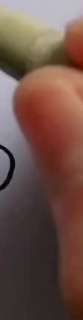
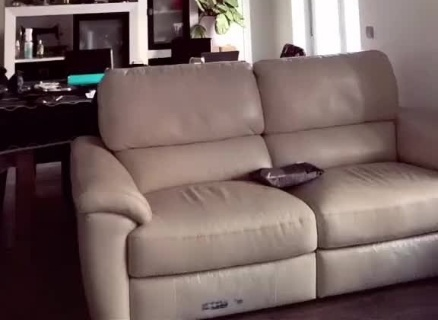
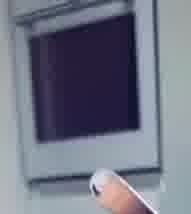
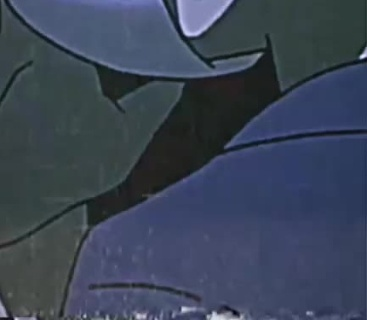
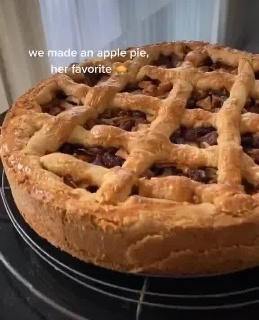
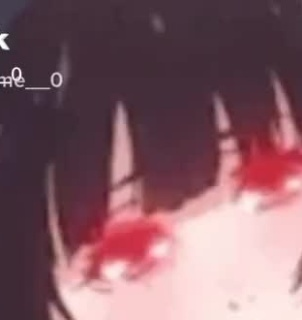
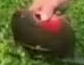
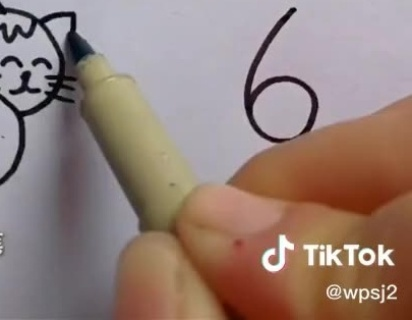
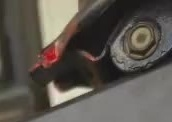
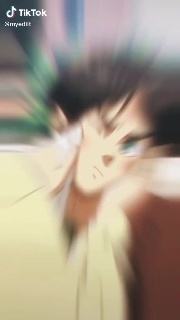

0

In [10]:
fd.vis.outliers_gallery()

## Duplicate Detections

With the `duplicates_gallery` view, visualize duplicate image pairs across videos.

100%|█████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 320.65it/s]


Stored similarity visual view in  work_dir/galleries/duplicates.html



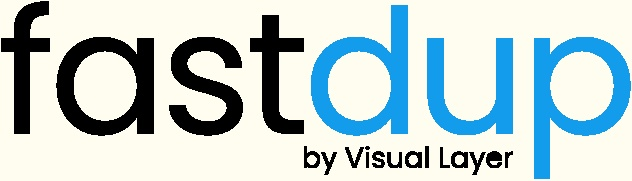
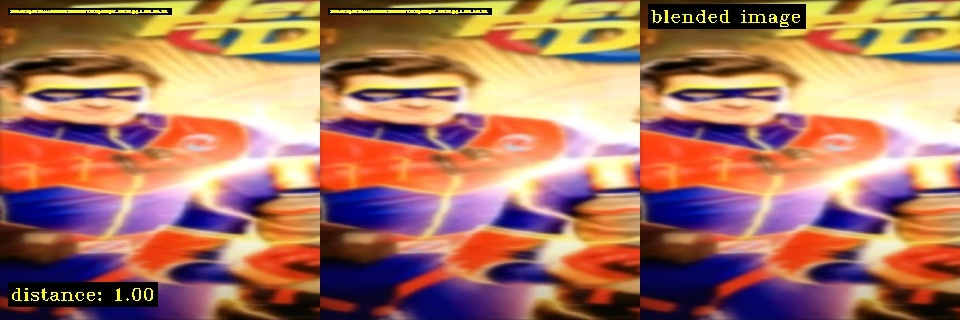
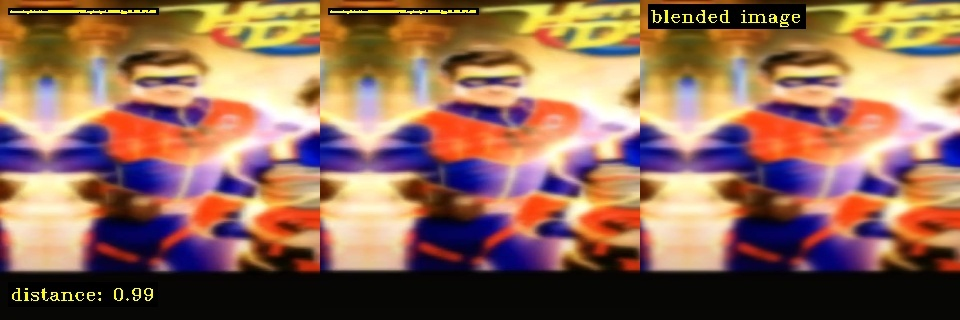
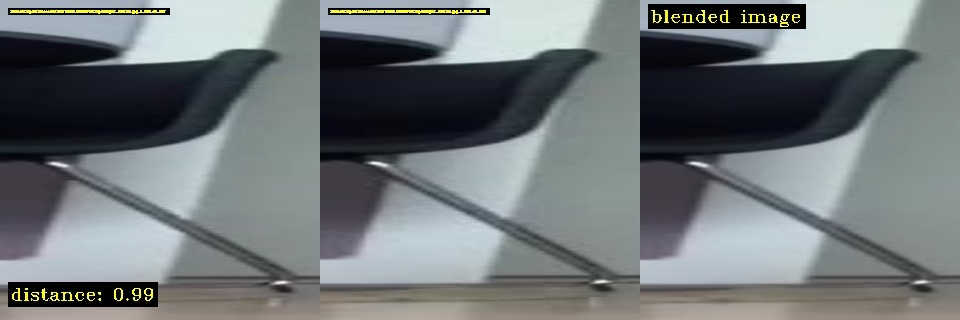
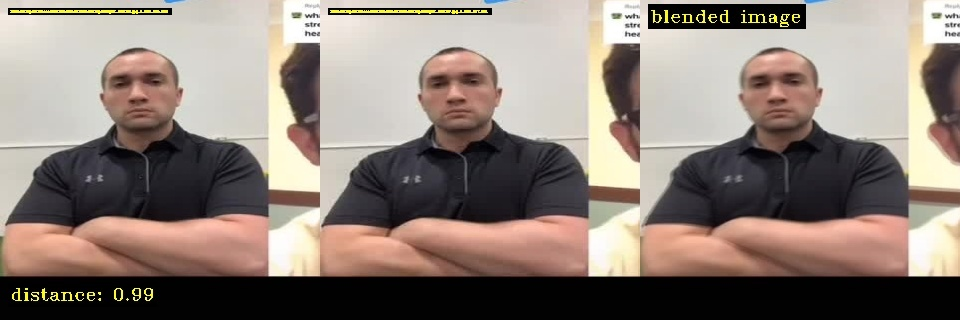
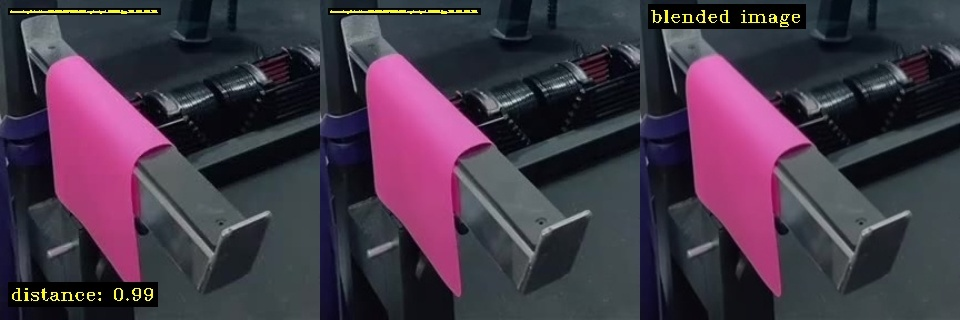
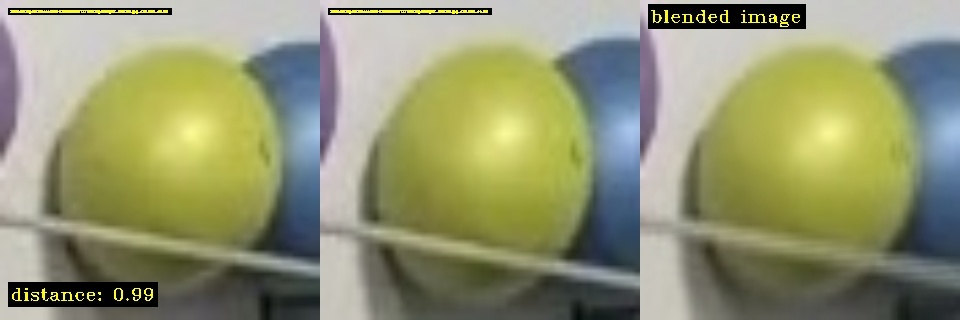
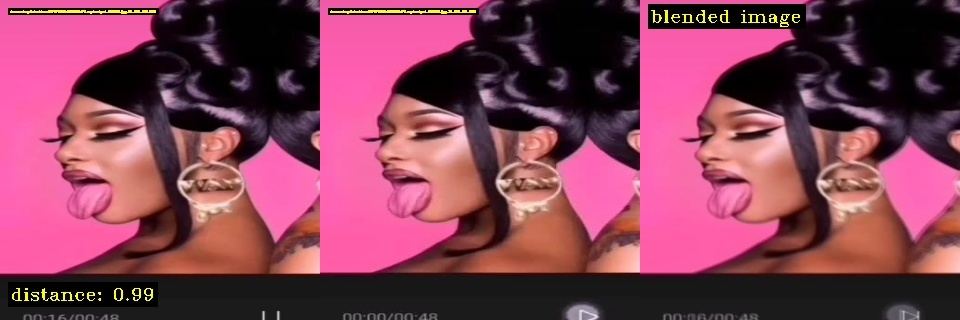
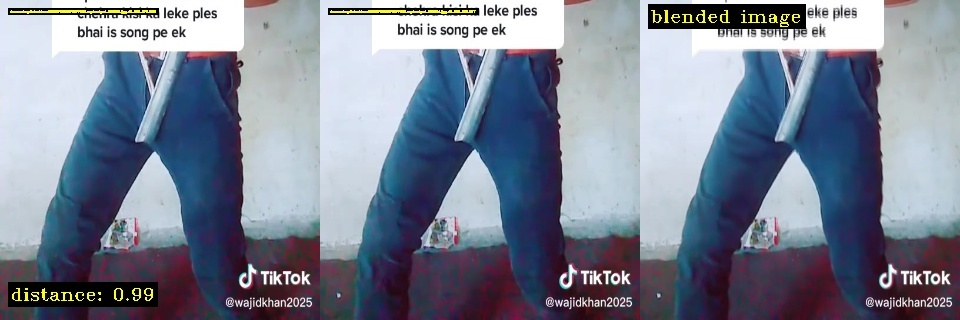
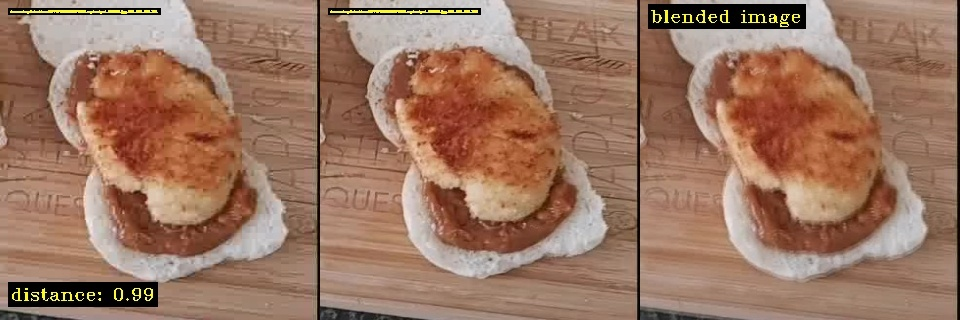
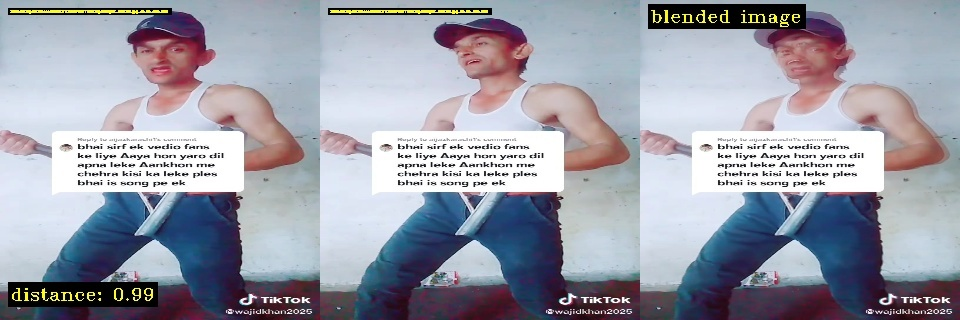

0

In [11]:
fd.vis.duplicates_gallery()

## Dark Detections

Using the `stats_gallery` view, we can sort the detections following a desired `metric` such as 'dark', 'bright' and 'blur'. 

100%|█████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 584.36it/s]

Stored mean visual view in  work_dir/galleries/mean.html



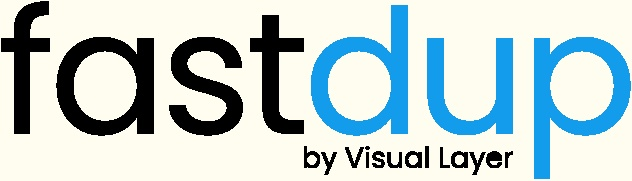
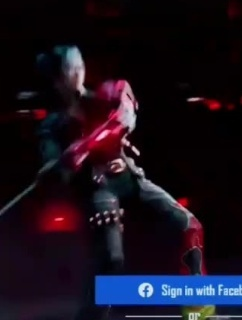
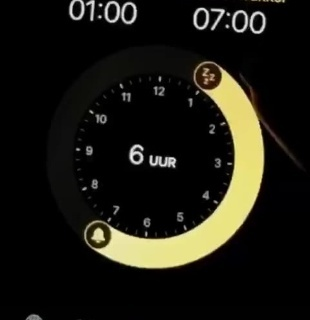
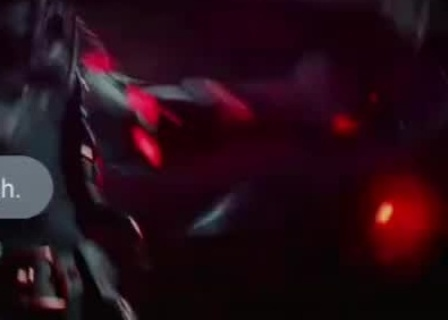
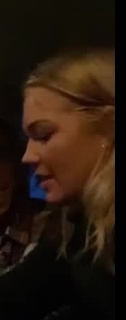
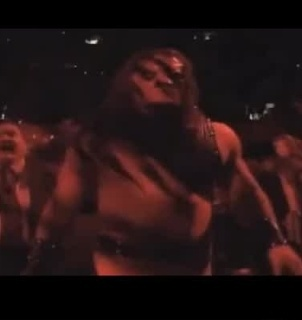
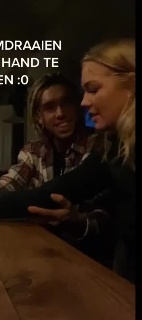
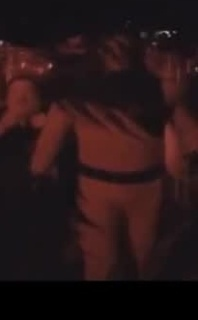
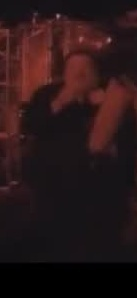
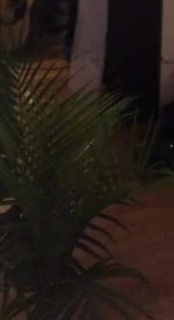
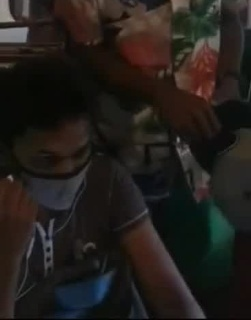
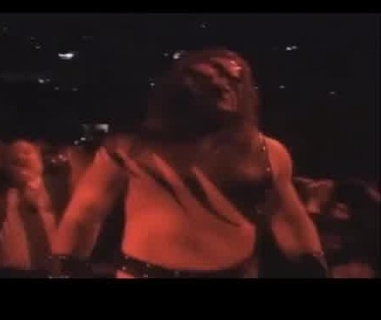
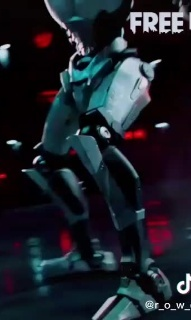
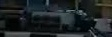
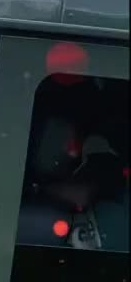
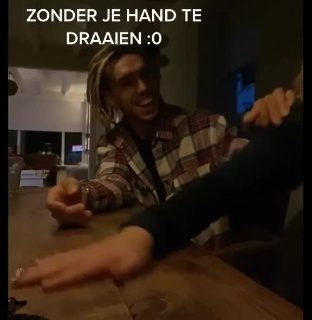
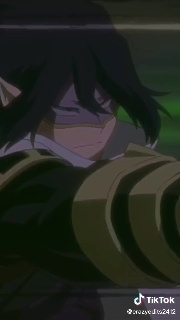
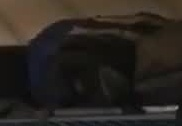
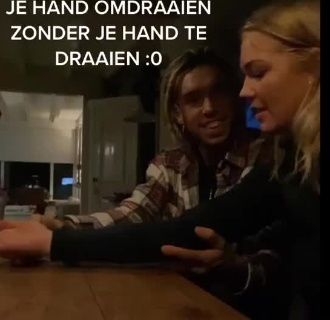
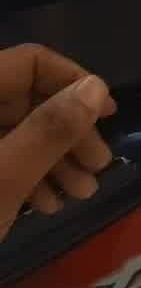

0

In [12]:
fd.vis.stats_gallery(metric='dark')

## Bright Detections

100%|█████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 769.01it/s]

Stored mean visual view in  work_dir/galleries/mean.html



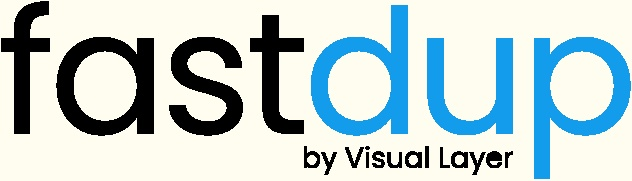
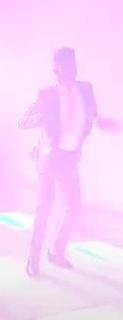
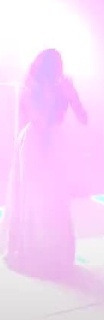
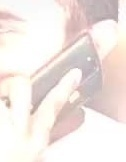
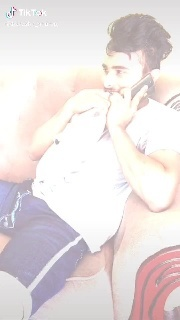
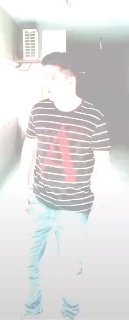
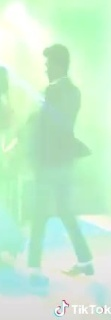
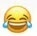
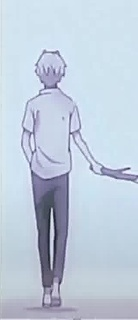
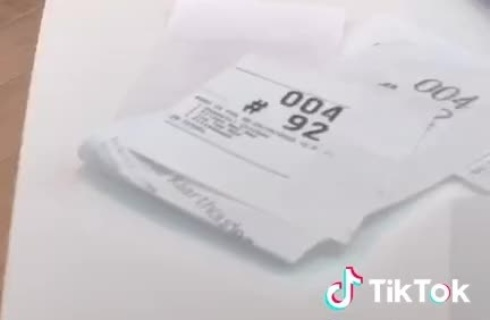
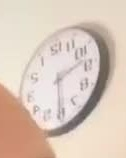
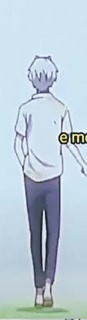
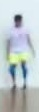
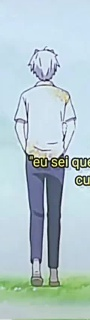
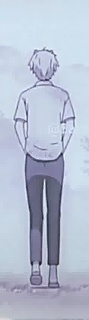
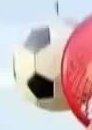
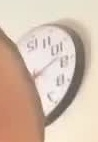
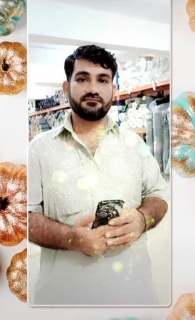
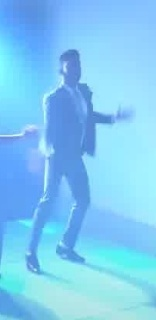
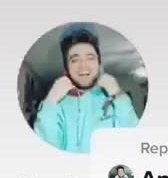
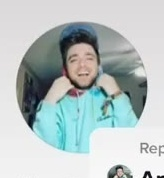

0

In [13]:
fd.vis.stats_gallery(metric='bright')

## Blurry Detections

100%|████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 2024.57it/s]

Stored blur visual view in  work_dir/galleries/blur.html



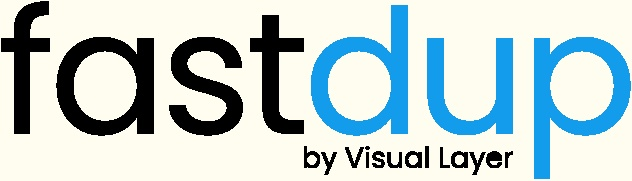
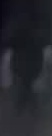
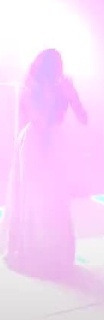
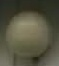
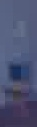
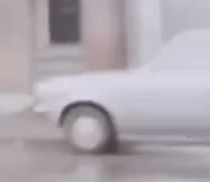
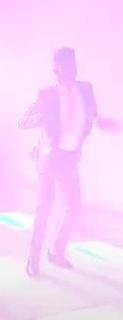
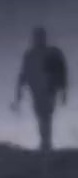
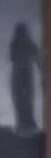
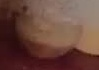
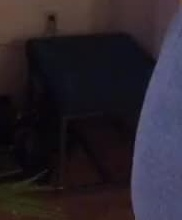
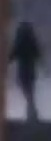
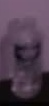
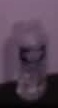
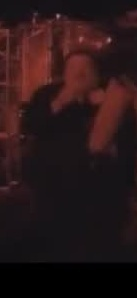
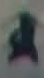
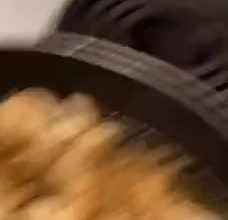
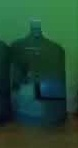
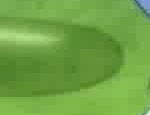
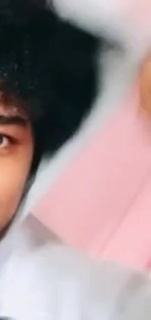

0

In [14]:
fd.vis.stats_gallery(metric='blur')

## Wrap Up

Next, feel free to check out other tutorials -

+ ⚡ [**Quickstart**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/quick-dataset-analysis.ipynb): Learn how to install fastdup, load a dataset and analyze it for potential issues such as duplicates/near-duplicates, broken images, outliers, dark/bright/blurry images, and view visually similar image clusters. If you're new, start here!
+ 🧹 [**Clean Image Folder**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/cleaning-image-dataset.ipynb): Learn how to analyze and clean a folder of images from potential issues and export a list of problematic files for further action. If you have an unorganized folder of images, this is a good place to start.
+ 🖼 [**Analyze Image Classification Dataset**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/analyzing-image-classification-dataset.ipynb): Learn how to load a labeled image classification dataset and analyze for potential issues. If you have labeled ImageNet-style folder structure, have a go!
+ 🎁 [**Analyze Object Detection Dataset**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/analyzing-object-detection-dataset.ipynb): Learn how to load bounding box annotations for object detection and analyze for potential issues. If you have a COCO-style labeled object detection dataset, give this example a try. 


## VL Profiler
If you prefer a no-code platform to inspect and visualize your dataset, [**try our free cloud product VL Profiler**](https://app.visual-layer.com) - VL Profiler is our first no-code commercial product that lets you visualize and inspect your dataset in your browser. 

[Sign up](https://app.visual-layer.com) now, it's free.

[![image](https://raw.githubusercontent.com/visual-layer/fastdup/main/gallery/vl_profiler_promo.svg)](https://app.visual-layer.com)

As usual, feedback is welcome! 

Questions? Drop by our [Slack channel](https://visualdatabase.slack.com/join/shared_invite/zt-19jaydbjn-lNDEDkgvSI1QwbTXSY6dlA#/shared-invite/email) or open an issue on [GitHub](https://github.com/visual-layer/fastdup/issues).